# Visualize GazeCom Event Properties

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
def plot_hist(hist, xlabel, xlog=False, ylog=False, title=""):
    ax = hist[0]
    for x in ax:
        #x.axvline(6.67, color='red', linewidth=2)
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)
        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
        x.set_title(title)
        x.set_xlabel(xlabel, labelpad=20, weight='bold', size=12)
        x.set_ylabel("# Events", labelpad=20, weight='bold', size=12)
        if ylog:
            x.set_ylim(0.1)
            x.set_yscale('log')
        if xlog:
            x.set_xlim(10)
            x.set_xscale('log')
        
px_to_deg_conv = 0.03727512386

In [4]:
path = 'data/gazecom_gt_event_df'
df_events = pd.read_pickle(path)
df_events[df_events['event']==2]

,event_id,start_time,end_time,duration,dx,dy,start_x,start_y,end_x,end_y,event,distance,angle,subject,video,panoptic_thing,panoptic_label,panoptic_track
1,1,277.0,313.0,36.0,71.8,250.1,639.3,110.1,711.1,360.2,2.0,9.699074,73.982013,AAF,beach,0.0,building,-1.0
3,3,528.0,550.0,22.0,-8.2,217.1,732.2,396.9,724.0,614.0,2.0,8.098200,92.163068,AAF,beach,0.0,sand,-1.0
5,5,1027.0,1068.0,41.0,-129.9,-0.7,769.7,470.1,639.8,469.4,2.0,4.842109,-179.691250,AAF,beach,0.0,sand,-1.0
7,7,1514.0,1547.0,33.0,12.8,13.9,670.8,454.9,683.6,468.8,2.0,0.704342,47.359166,AAF,beach,1.0,person,-1.0
10,10,2567.0,2591.0,24.0,-5.6,-38.8,684.2,460.7,678.6,421.9,2.0,1.461261,-98.212780,AAF,beach,0.0,dirt,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85959,85959,18700.0,18724.0,24.0,-1.4,25.5,375.5,314.4,374.1,339.9,2.0,0.951947,93.142496,YFK,street,1.0,car,-1.0
85961,85961,18812.0,18852.0,40.0,229.8,-8.2,387.1,351.6,616.9,343.4,2.0,8.571275,-2.043630,YFK,street,0.0,tree,-1.0
85963,85963,18940.0,18984.0,44.0,-310.6,3.5,644.6,354.6,334.0,358.1,2.0,11.578389,179.354389,YFK,street,1.0,car,161.0
85965,85965,19260.0,19292.0,32.0,100.7,-5.2,419.3,361.6,520.0,356.4,2.0,3.758606,-2.956044,YFK,street,1.0,car,161.0


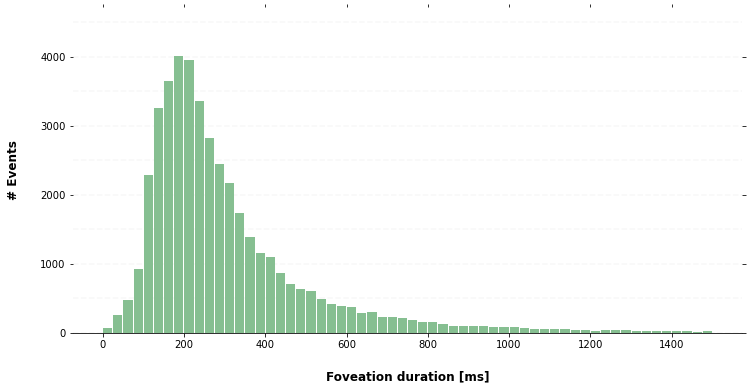

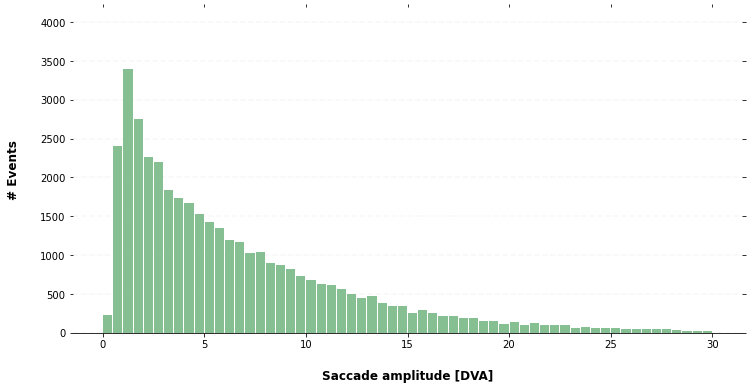

In [7]:
dfov = df_events[df_events.event.isin([1,3])] # filter noise!
hist = dfov.hist(column='duration', bins=60, grid=False, figsize=(12,6), color='#86bf91', zorder=5, rwidth=0.9, range=(0,1500))
plot_hist(hist, "Foveation duration [ms]", ylog=False)
plt.savefig('foveation_duration.png', dpi = 400)
dsac = df_events[df_events['event']==2].reset_index(drop=True,) 
hist = dsac.hist(column='distance', bins=60, grid=False, figsize=(12,6), color='#86bf91', zorder=5, rwidth=0.9, range=(0,30))
plot_hist(hist, "Saccade amplitude [DVA]", ylog=False)
plt.savefig('saccades_amplitude.png', dpi = 400)

In [8]:
print('Histogramm Foveation Duration incluses ',len(dfov[dfov.duration <= 1500])/len(dfov), ' Percent of data, duration over 1500 is unreasonable long')
print('Histogramm Saccade amplitude incluses ',len(dsac[dsac.distance <= 30])/len(dsac), ' Percent of data, amplitude over 30 DVA is unreasonable far')

Histogramm Foveation Duration incluses  0.9893666204345816  Percent of data, duration over 1500 is unreasonable long
Histogramm Saccade amplitude incluses  0.9926307468699799  Percent of data, amplitude over 30 DVA is unreasonable far


In [19]:
dsac[dsac.distance <= 30].distance.mean()

6.467933643130722

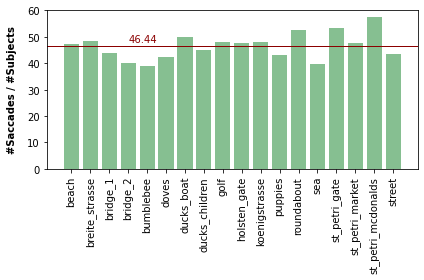

In [17]:
video_names = sorted(dsac.video.unique())
saccades_per_video = []
for name in video_names:
    num_saccades = len(dsac[dsac.video == name])
    num_subjects = len(dsac[dsac.video == name].subject.value_counts().index) # Len(List Subjects)
    saccades_per_video.append(num_saccades/num_subjects)
fig = plt.figure()
plt.bar(video_names,saccades_per_video,color = '#86bf91')
plt.axhline(np.mean(saccades_per_video), color='darkred', linewidth=1)
plt.text(3,48,"%.2f" % (np.mean(saccades_per_video)),color='darkred')
plt.xticks(rotation='vertical')
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

plt.ylabel("#Saccades / #Subjects", labelpad=10, weight='bold')

plt.tight_layout()

#plt.savefig('saccades_per_video.png', dpi = 400)

In [9]:
path = 'data/df_foveation'
df = pd.read_pickle(path)
len(df[(df.video == 'bumblebee') & (df.subject == 'AAF')])

1687

In [10]:
len(df[(df.video == 'beach') & (df.subject == 'AAF')])

4024